In [28]:
import requests
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [50]:
# My API key
api_key = "c3d05ffb1ba69bd10c9e6af99e869f55"

# List of cities and their coordinates
cities = [
    {"name": "New York", "lat": 40.7128, "lon": -74.0059},
    {"name": "London", "lat": 51.5074, "lon": -0.1278},
    {"name": "Tokyo", "lat": 35.6762, "lon": 139.6503},
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"name": "Cape Town", "lat": -33.9249, "lon": 18.4241}
]

# Function to fetch 5-day forecast data
def fetch_5day_forecast(city):
    base_url = "https://api.openweathermap.org/data/2.5/forecast"
    params = {
        "lat": city["lat"],
        "lon": city["lon"],
        "appid": api_key,
        "units": "metric"
    }
    response = requests.get(base_url, params=params)
    return response.json()

# Fetch data for each city
forecast_5day_data = {}
for city in cities:
    forecast_5day_data[city["name"]] = fetch_5day_forecast(city)

# Check to verify that data has being exctracted
print(forecast_5day_data)


{'New York': {'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1715698800, 'main': {'temp': 18.07, 'feels_like': 17.73, 'temp_min': 18.07, 'temp_max': 20.38, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1015, 'humidity': 69, 'temp_kf': -2.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 3.58, 'deg': 198, 'gust': 5.79}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-05-14 15:00:00'}, {'dt': 1715709600, 'main': {'temp': 19.24, 'feels_like': 18.92, 'temp_min': 19.24, 'temp_max': 21.58, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 1013, 'humidity': 65, 'temp_kf': -2.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'clouds': {'all': 33}, 'wind': {'speed': 5.29, 'deg': 159, 'gust': 6.27}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-05-14 18:00:00'}, {'dt': 1715720400, 'main': {'temp': 18.63, 'feels_l

In [51]:
# Create a dictionary to store the data frames for each city
city_dataframes = {}

# Loop through the forecast data and create separate data frames for each city
for city_name, city_data in forecast_5day_data.items():
    dates = [datetime.fromtimestamp(data['dt']) for data in city_data['list']]
    temperatures = [data['main']['temp'] for data in city_data['list']]
    pressures = [data['main']['pressure'] for data in city_data['list']]
    humidities = [data['main']['humidity'] for data in city_data['list']]
    wind_speeds = [data['wind']['speed'] for data in city_data['list']]

    city_df = pd.DataFrame({
        'date': dates,
        'temperature': temperatures,
        'pressure': pressures,
        'humidity': humidities,
        'wind_speed': wind_speeds
    })

    city_dataframes[city_name] = city_df

In [52]:
# Check for correctness of data in dictionary
print(city_dataframes["New York"])

                  date  temperature  pressure  humidity  wind_speed
0  2024-05-14 11:00:00        18.07      1018        69        3.58
1  2024-05-14 14:00:00        19.24      1017        65        5.29
2  2024-05-14 17:00:00        18.63      1015        73        1.87
3  2024-05-14 20:00:00        18.28      1014        80        2.97
4  2024-05-14 23:00:00        17.12      1014        84        2.67
5  2024-05-15 02:00:00        16.26      1013        84        2.12
6  2024-05-15 05:00:00        15.43      1012        89        1.90
7  2024-05-15 08:00:00        15.53      1012        88        2.17
8  2024-05-15 11:00:00        15.71      1012        93        3.43
9  2024-05-15 14:00:00        15.51      1011        94        4.30
10 2024-05-15 17:00:00        15.33      1009        94        4.71
11 2024-05-15 20:00:00        15.30      1009        95        5.75
12 2024-05-15 23:00:00        15.02      1009        94        6.46
13 2024-05-16 02:00:00        14.62      1008   

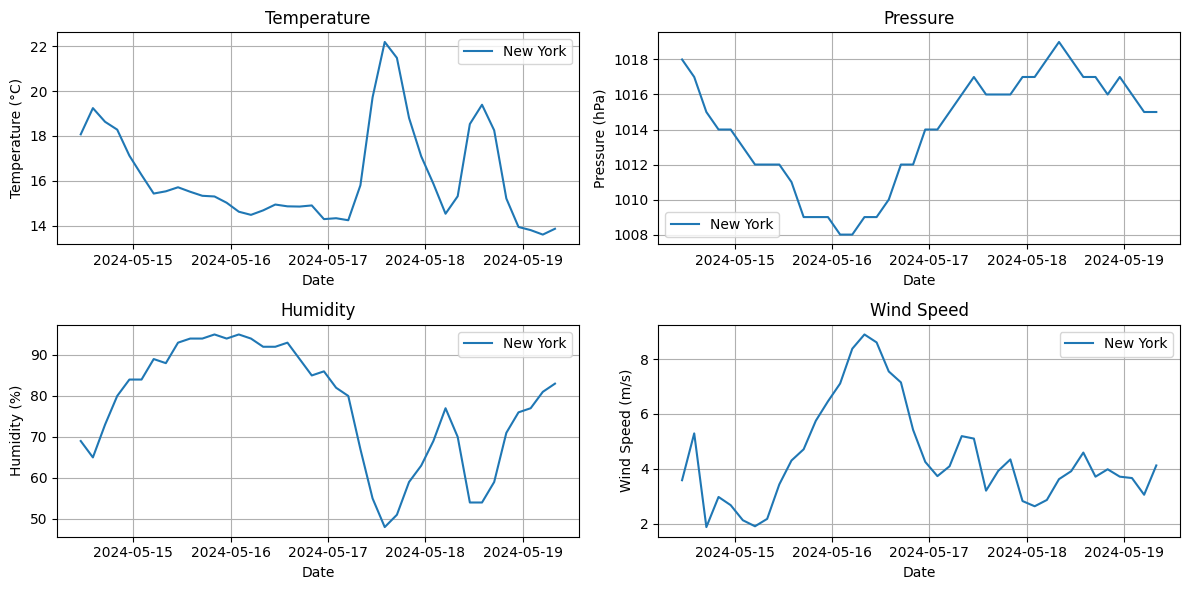

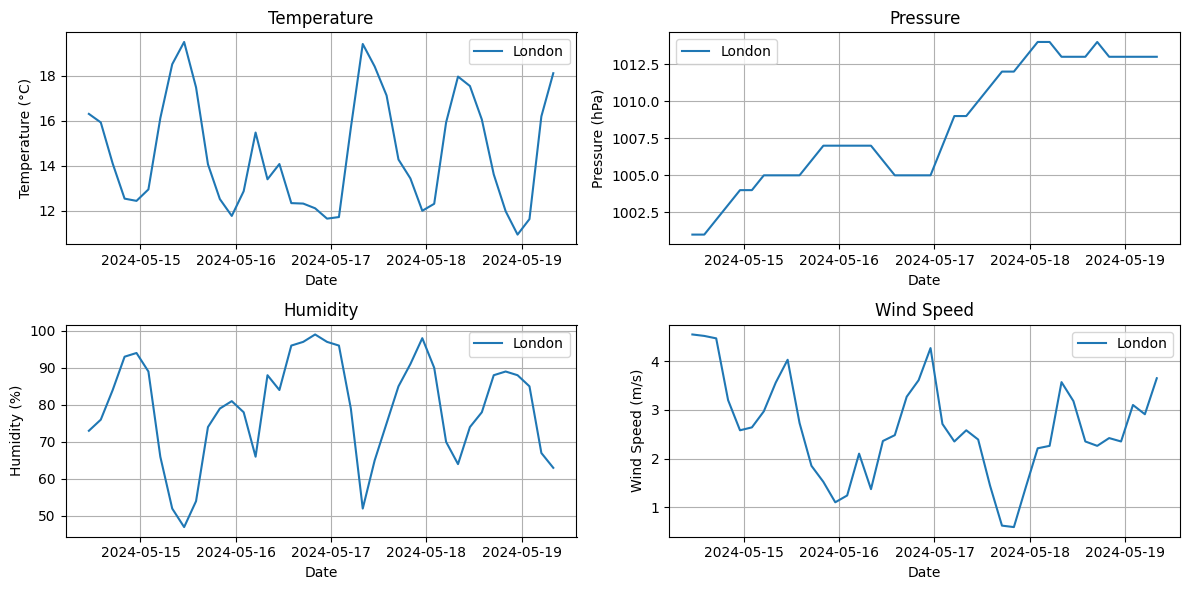

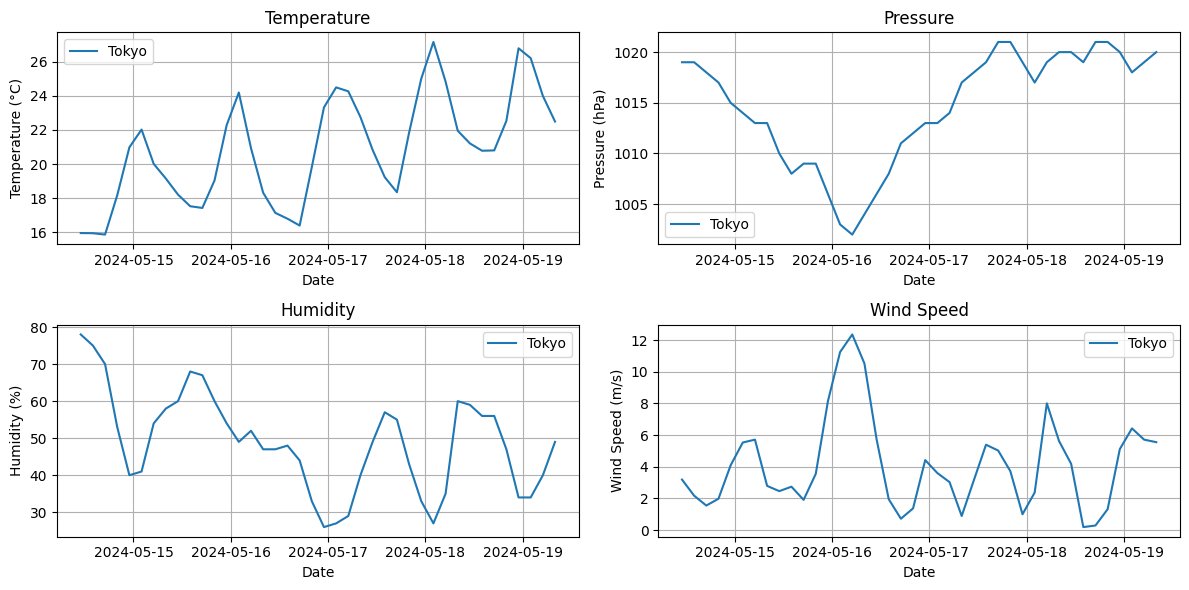

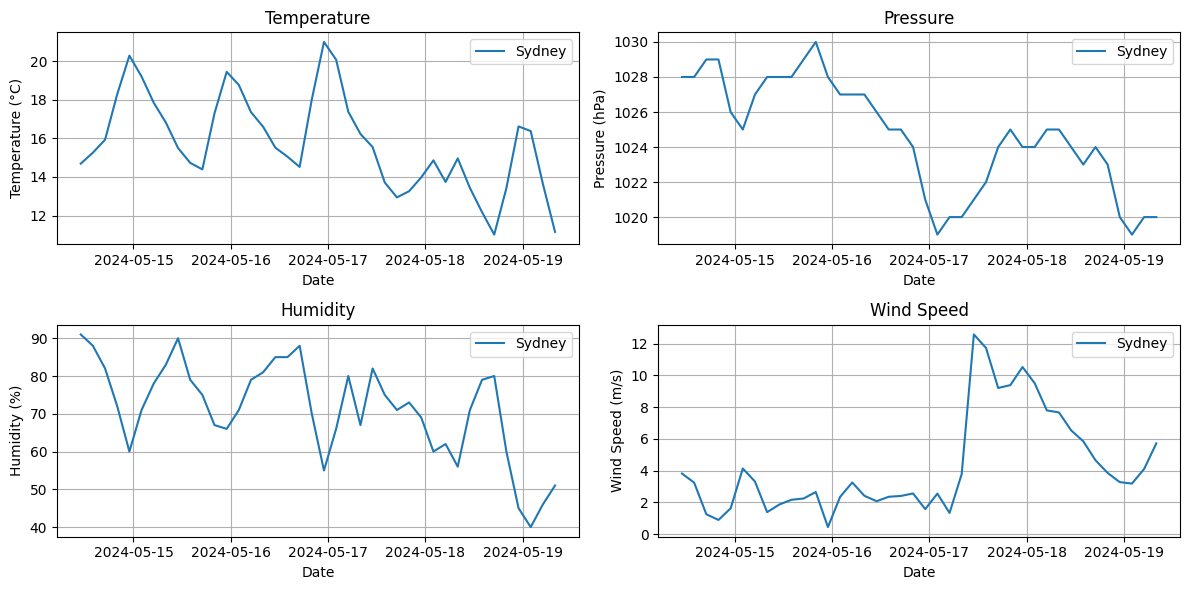

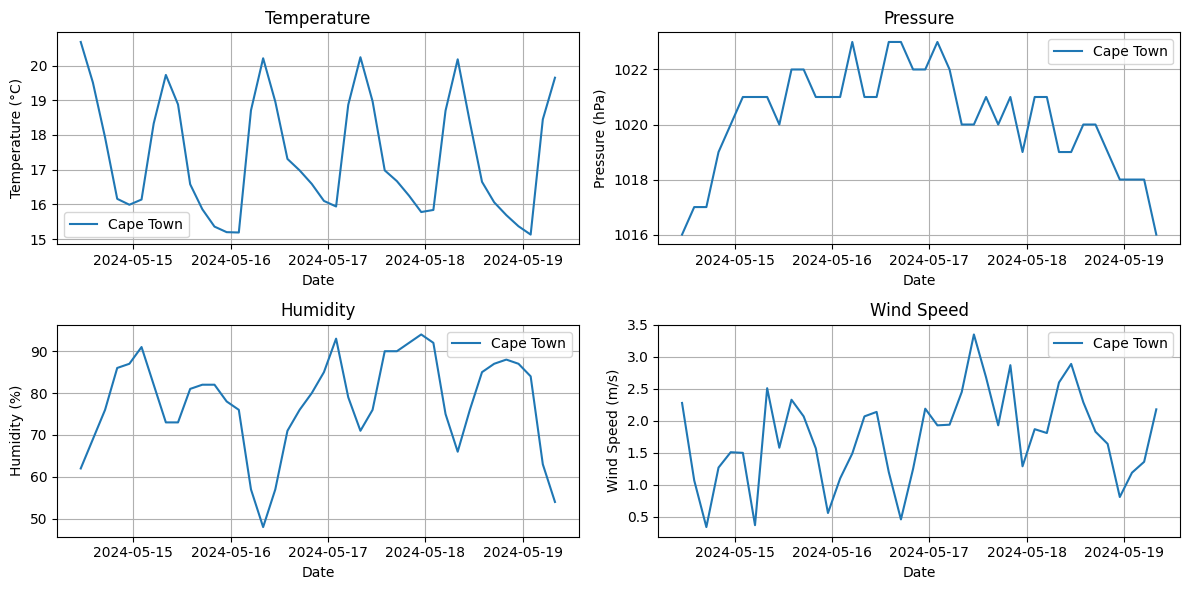

In [53]:
# Plot temperature, pressure, humidity, and wind speed for each city
for city_name, city_df in city_dataframes.items():
    plt.figure(figsize=(12, 6))

    # Temperature
    plt.subplot(2, 2, 1)
    plt.plot(city_df['date'], city_df['temperature'], label=city_name)
    plt.title('Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)

    # Pressure
    plt.subplot(2, 2, 2)
    plt.plot(city_df['date'], city_df['pressure'], label=city_name)
    plt.title('Pressure')
    plt.xlabel('Date')
    plt.ylabel('Pressure (hPa)')
    plt.legend()
    plt.grid(True)

    # Humidity
    plt.subplot(2, 2, 3)
    plt.plot(city_df['date'], city_df['humidity'], label=city_name)
    plt.title('Humidity')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.legend()
    plt.grid(True)

    # Wind Speed
    plt.subplot(2, 2, 4)
    plt.plot(city_df['date'], city_df['wind_speed'], label=city_name)
    plt.title('Wind Speed')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
